### Project - AllLife Bank Unsupervised Learning

#### Description
###### Context:
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help

#### Objective: 
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

#### Dataset:  ALLLife bank
Data Description: Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

Apply the concepts and techniques you have learned in the previous weeks and summarize your insights at the end.
Key Questions:

#### Perform EDA.
Apply Clustering Algorithms and mentions how many clusters are formed ?
How are these segments different from each other?
What are your recommendations to the bank on how to better market to and service these customers?


### Index

- <a href = #link1>Overview of the dataset</a>


- <a href = #link2>EDA</a> 


- <a href = #link3>Data Pre-processing</a>


- <a href = #link4>Applying K-means clustering algorithms</a> 


- <a href = #link5>Applying Hierarchical clustering</a>


- <a href = #link6>"Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights"</a>


- <a href = #link7>Business Recommendations/Actionable Insights</a>

## <a id = "link1"></a> Overview of the dataset 

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_excel("Credit Card Customer Data.xlsx")

<IPython.core.display.Javascript object>

In [3]:
# copying the data to another variable to avoid any changes to original data
data = data.copy()

<IPython.core.display.Javascript object>

In [4]:
data.head(25)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


<IPython.core.display.Javascript object>

In [5]:
data.shape

(660, 7)

<IPython.core.display.Javascript object>

* The dataset has 600 rows and 7 columns 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


<IPython.core.display.Javascript object>

In [7]:
data.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
data[data.duplicated()].count()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

<IPython.core.display.Javascript object>

* There is no null values
* There is no duplicated data
* There is many zeros in the data that we could look at and decide if we need to fix them

In [9]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

<IPython.core.display.Javascript object>

* Sl_No  and Customer key have the most unique values but we have no use for theses two rows so we can drop them.
* After that Avg _Credit _limit has the most at 110

In [10]:
cat_cols = [
    "Sl_No",
    "Customer Key",
    "Avg_Credit_Limit",
    "Total_Credit_Cards",
    "Total_visits_bank",
    "Total_visits_online",
    "Total_calls_made",
]

for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 30)

660    1
226    1
224    1
223    1
222    1
      ..
440    1
439    1
438    1
437    1
1      1
Name: Sl_No, Length: 660, dtype: int64
------------------------------
47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64
------------------------------
8000      35
6000      31
9000      28
13000     28
10000     26
19000     26
7000      24
11000     24
18000     23
14000     23
17000     23
16000     22
5000      21
20000     20
12000     18
15000     17
36000     11
70000     10
38000      8
50000      8
56000      7
39000      7
68000      7
52000      6
37000      6
34000      6
30000      6
74000      6
47000      6
48000      6
41000      6
60000      5
29000      5
26000      5
65000      5
31000      5
54000      4
51000      4
59000      4
73000      4
71000      4
49000      4
69000      4
64000      4
66000      4
33000      4
28000      3
67000      3
62000    

<IPython.core.display.Javascript object>

* looking at the unique values we can see that the top five cedit limits are:

     - 1) 8000 with 35 customers
     - 2) 6000 with 31 customers
     - 3) 9000 with  28 customers
     - 4) 13000 with  28 customers
     - 5) 10000 with  26 customers
 
    
* The top number of cedit cards per a person are:
    - 1) 4 cards with 151 customers
    - 2) 6 cards with 117 customers
    - 3) 7 cards with 101 customers
    - 4) 5 cards with 74 customers
    - 5) 2 cards with 64 customers
    
    
* The highest bank visit is 2 with with 158 customers
* The highest online visits is 2 with 189 customers
* The highest calls made was 4 by 108 customers
    

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


<IPython.core.display.Javascript object>

* By looking at the summary we can see that :
    - Sl_No is 1 for min and 330.50 at midean and at 660 at max
    - Customer Key is 	11265.0 for min and 53874.5 at midean and at 99843.0 at max
    - Avg_Credit_Limit is 3000 for min and 18000 at midean and at 200000 at max
    - Total_Credit_Cards is 1 for min and 5 at midean and at 10 at max
    - Total_visits_bank is 0 for min and 2 at midean and at 5 at max
    - Total_visits_online is 0 for min and 2 at midean and at 10 at max
    - Total_calls_made is 0 for min and 3 at midean and at 15 at max
    
    
    
    
 *  We should drop Sl_No and Customer Key

## <a id = "link2"></a> EDA

In [12]:
data.drop("Sl_No", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [13]:
data.drop("Customer Key", axis=1, inplace=True)

<IPython.core.display.Javascript object>

* dropping the serial no. and Customer_Key columns as they do not provide any information

###### Univariate Analysis

In [14]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

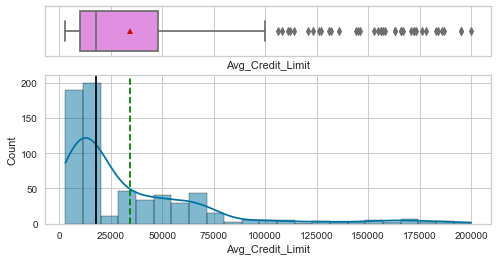

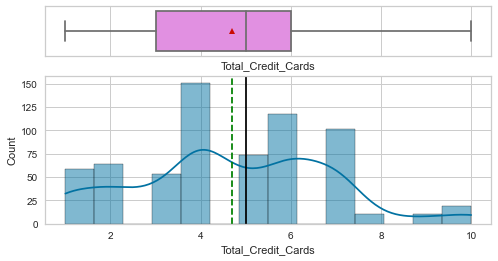

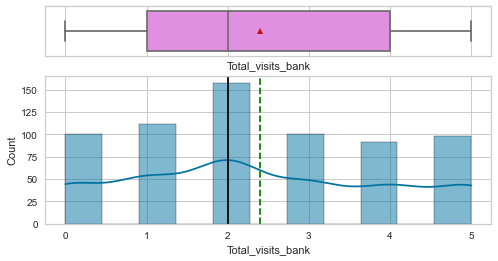

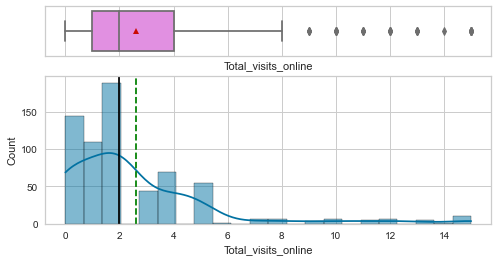

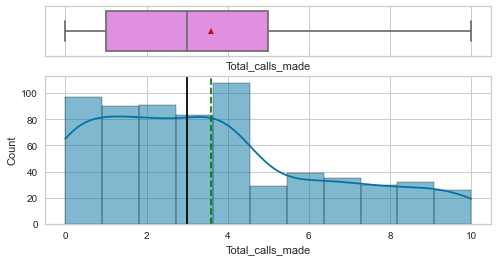

<IPython.core.display.Javascript object>

In [15]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item, kde=True, figsize=(8, 4))

* Avg_Credit_Limit : We can see there are alot of outliers in the Avg_Credit_Limit variable.
  Some variation is always expected in real-world scenarios for the income/credit variable and the distribution is highly skewed to the right; but we can remove the data point on the extreme right end of the boxplot
  
* Total_Credit_Cards: the distribution is normal with a midean just pass four.
* Total_visits_bank: the distribution is with a midean around 2 
* Total_visits_online: the distribution is highly skewed to the right and also have a few outliers that we can take care of in    data processimg
* Total_calls_made: the distribution is lightly skewed to the right with midean of 2 to 4 calls made.

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

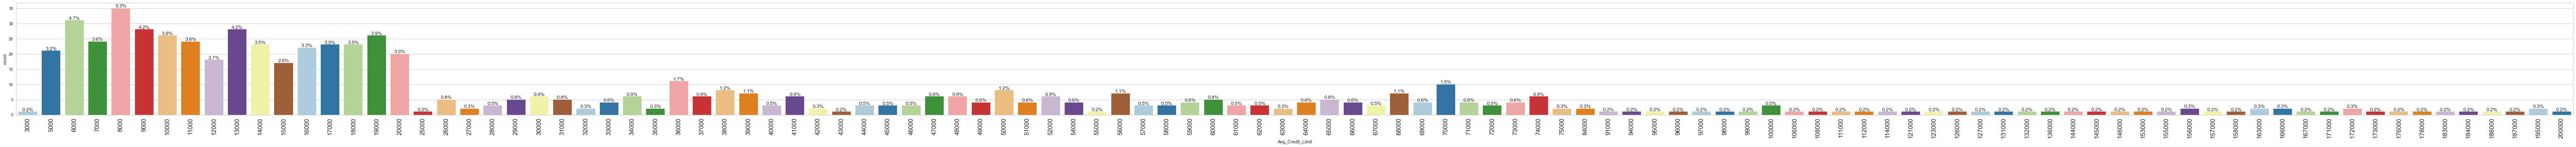

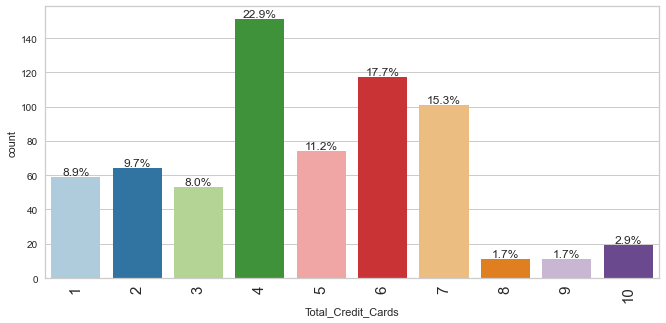

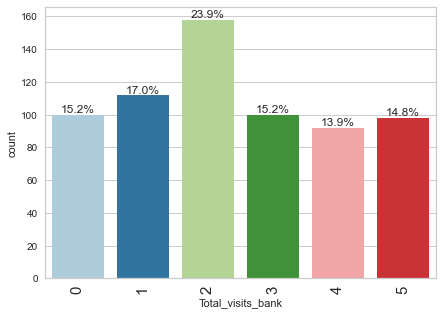

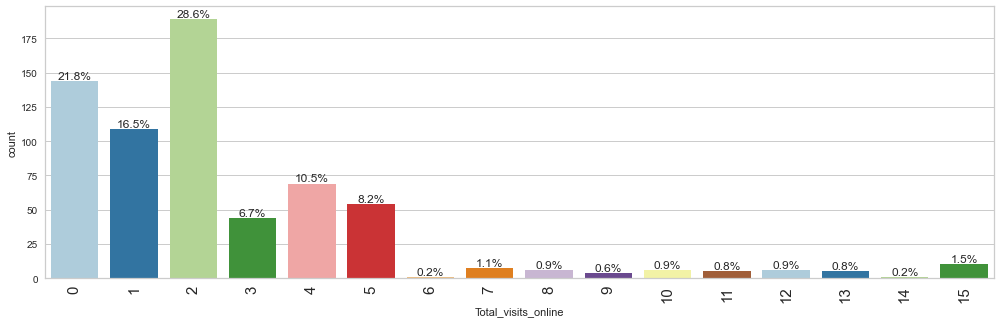

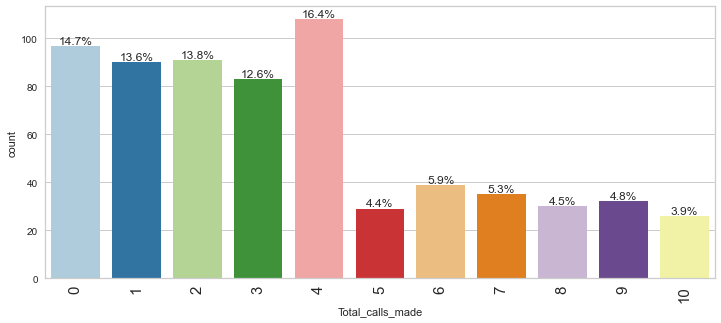

<IPython.core.display.Javascript object>

In [17]:
for item in num_col:
    labeled_barplot(data, item, perc=True)

* Total_Credit_Cards is at 4 at 22.9%
* Total_visits_bank is is at 2 23.9%
* Total_visits_online is at 2 28.6%
* Total_calls_made is at 4 at 16.4%

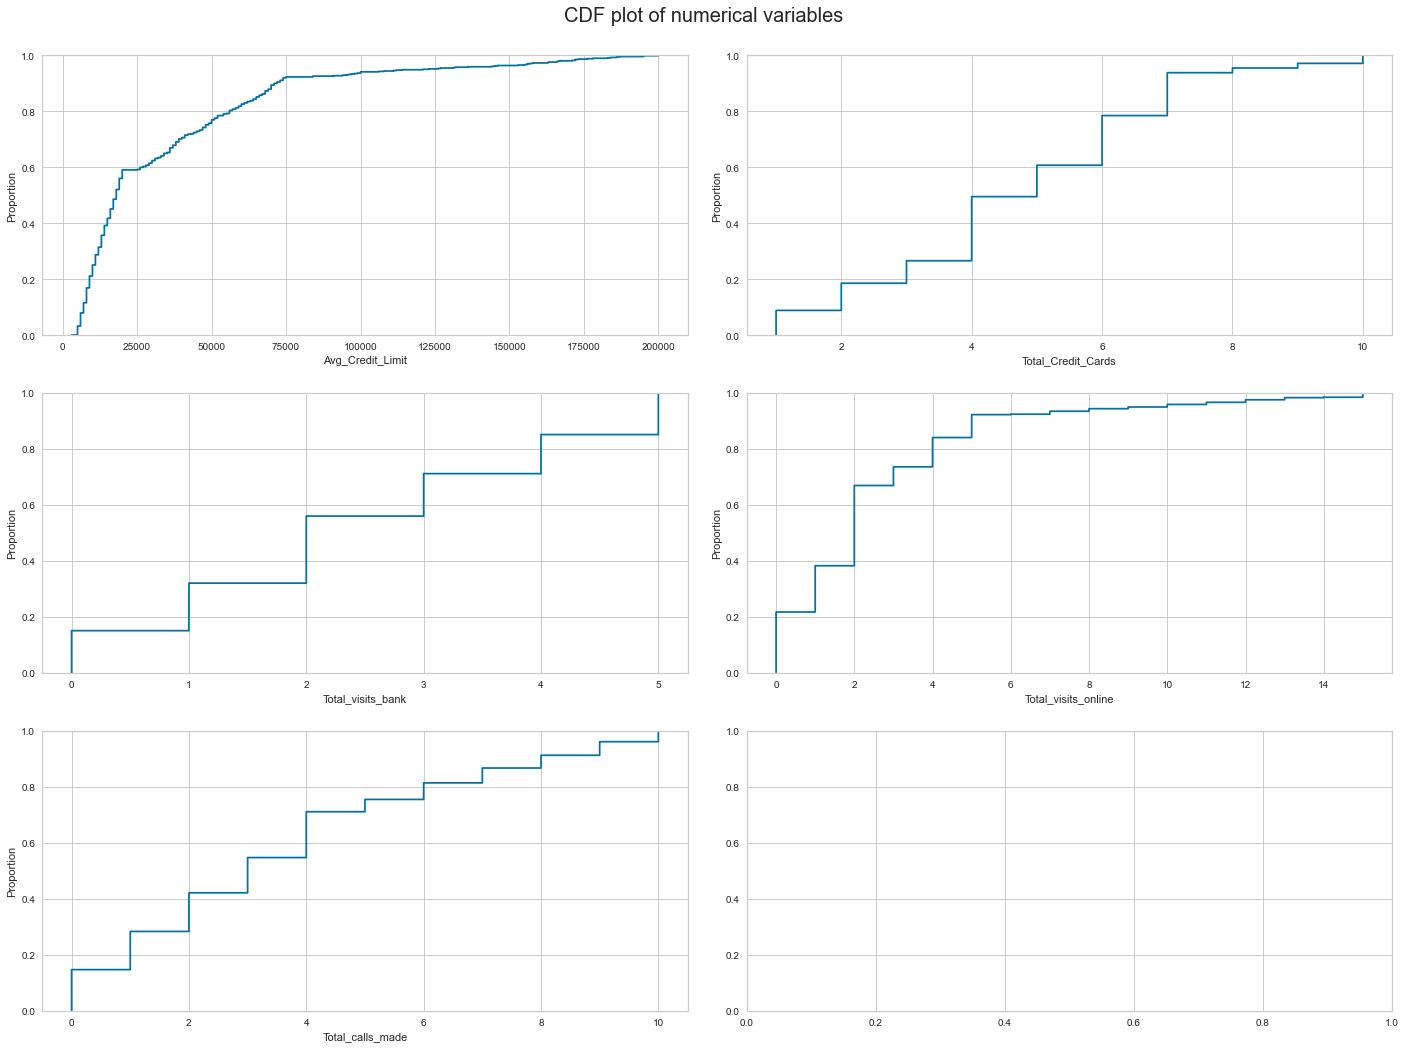

<IPython.core.display.Javascript object>

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=data[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=data[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

* 90% of the customers Avg Credit limits are below 100000.
* 95% of the customers have 7 cards or less.
* 80% of the customers visited the bank 4 times or less.
* 90% of the customers visited the online site 5 times or less.
* 90% of the customers called 8 times oe less.

### Bivariate Analsysis

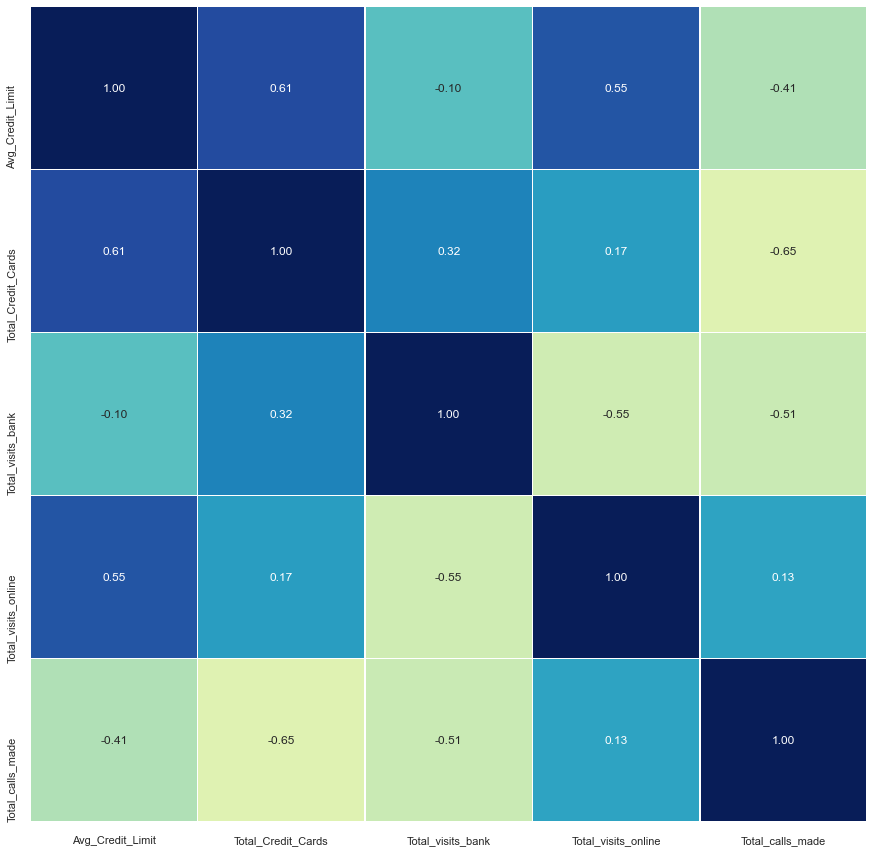

<IPython.core.display.Javascript object>

In [19]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=0.5,
    center=0,
    cbar=False,
    cmap="YlGnBu",
    fmt="0.2f",
)
plt.show()

* There is a mild correlationsip between Total Credit Cards and Avg Credit limit at .61
* There is a mild correlationsip between online visits and Avg Credit limit at .55

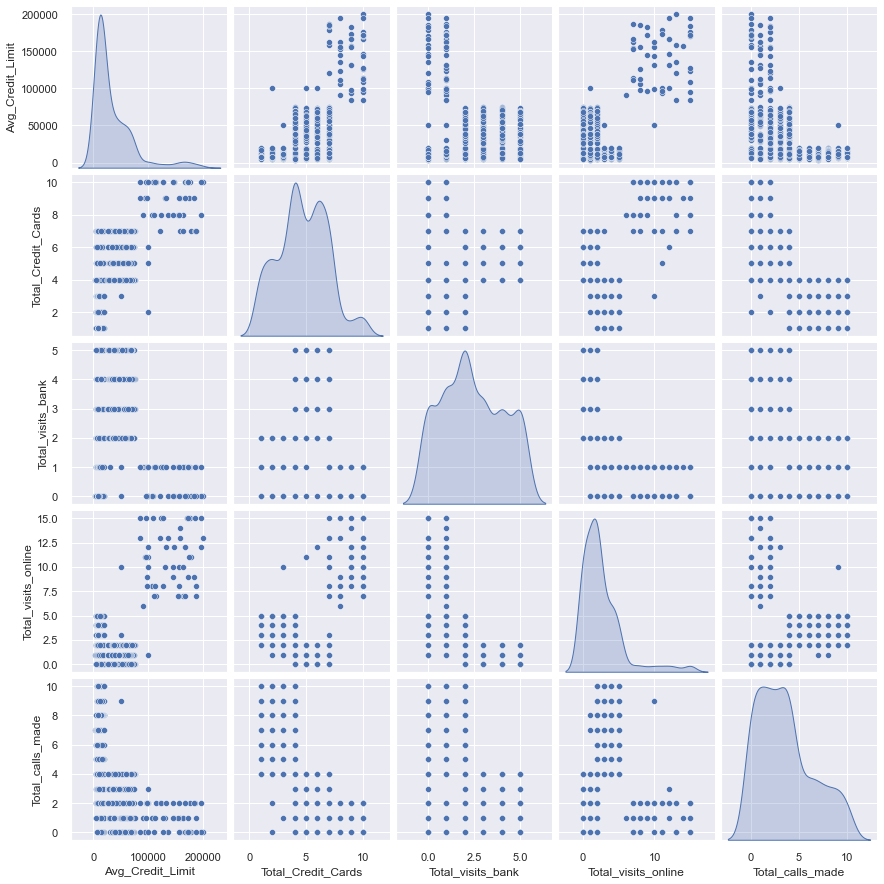

<IPython.core.display.Javascript object>

In [20]:
sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

* There are overlaps no clear distinction in the distribution of variables for customers 
* Let's explore this further with the help of other plots.

In [64]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Total_Credit_Cards"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Total_Credit_Cards"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Total_Credit_Cards    1   2   3    4   5    6   7  8  9  All
Total_visits_online                                         
0                     0   0   0   44  22   35  43  0  0  144
1                     0   1   2   25  23   38  20  0  0  109
2                    18  14  12   44  28   43  30  0  0  189
3                     9  15   8   11   0    0   1  0  0   44
4                    17  18  14   20   0    0   0  0  0   69
5                    15  16  16    7   0    0   0  0  0   54
6                     0   0   0    0   0    0   0  1  0    1
8                     0   0   0    0   0    0   0  0  1    1
All                  59  64  52  151  73  116  94  1  1  611
------------------------------------------------------------------------------------------------------------------------


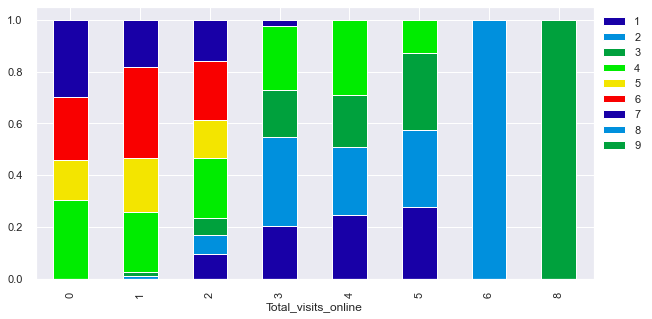

<IPython.core.display.Javascript object>

In [65]:
stacked_plot(data["Total_visits_online"])

* Customers with 8 or 9 cards have fewer visits online
* Customers with 4 to 7 cards visit the online site 0 to 3 times 

Total_Credit_Cards   1   2   3    4   5    6   7  8  9  All
Total_visits_bank                                          
0                   21  25  20   13   0    0   0  0  1   80
1                   21  19  18   22   1    0   1  1  0   83
2                   17  20  14   35  24   24  24  0  0  158
3                    0   0   0   26  15   34  25  0  0  100
4                    0   0   0   27  18   24  23  0  0   92
5                    0   0   0   28  15   34  21  0  0   98
All                 59  64  52  151  73  116  94  1  1  611
------------------------------------------------------------------------------------------------------------------------


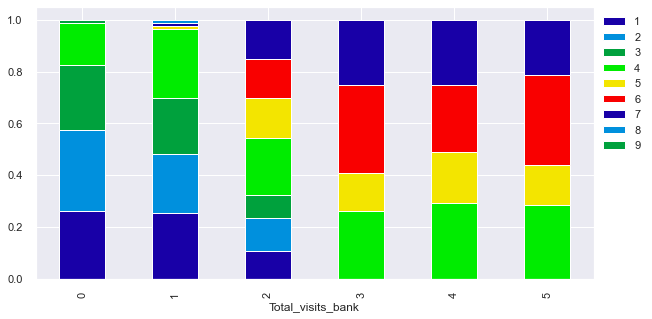

<IPython.core.display.Javascript object>

In [66]:
stacked_plot(data["Total_visits_bank"])

* Customers with 4 to 7 cards visit the bank the most 2 to 5 times
* Customers with 1 to 4 cards visit the bank on averge o to 3 times 

## <a id = "link3"></a> Data pre-processing

##### Outlier detection using IQR

In [22]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


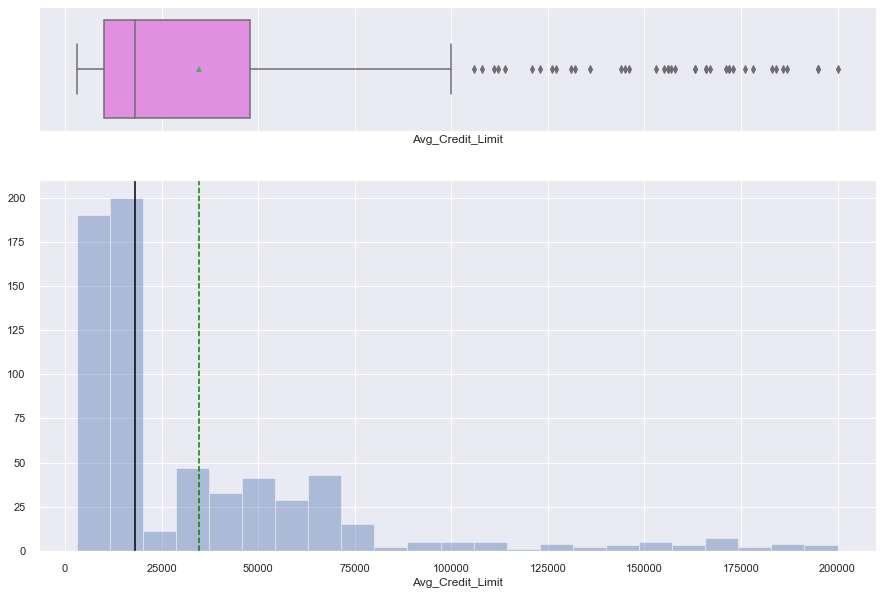

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data["Avg_Credit_Limit"])

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


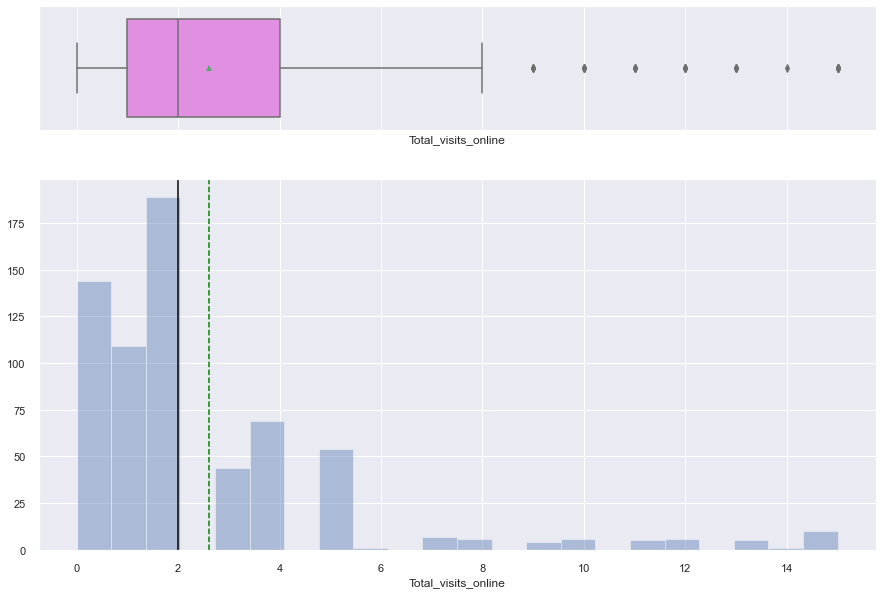

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data["Total_visits_online"])

In [25]:
cols = ["Avg_Credit_Limit", "Total_visits_online"]  # one or more

Q1 = data[cols].quantile(0.25)
Q3 = data[cols].quantile(0.75)
IQR = Q3 - Q1

data = data[
    ~((data[cols] < (Q1 - 1.5 * IQR)) | (data[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
]

<IPython.core.display.Javascript object>

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(None,)

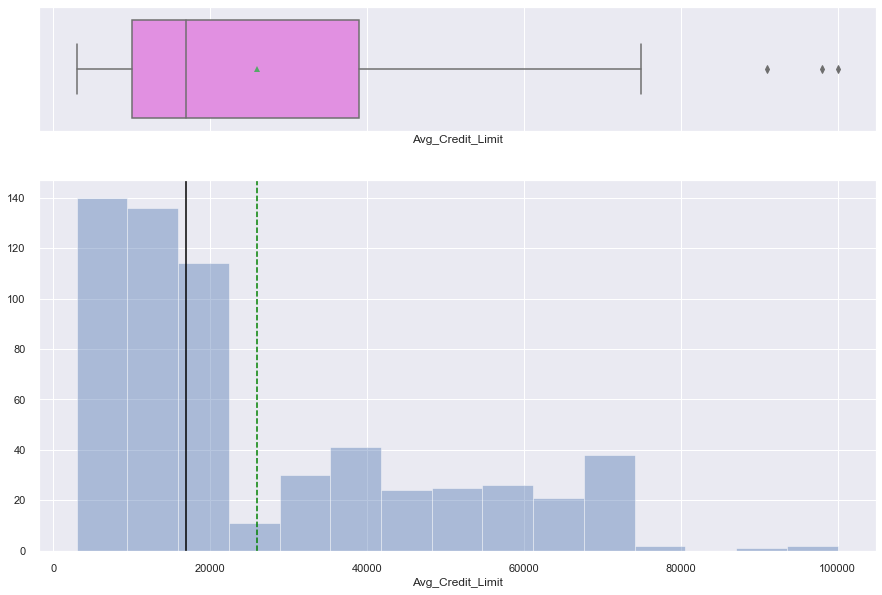

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data["Avg_Credit_Limit"]),  # "Total_visits_online"

C:\Users\robby\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\robby\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


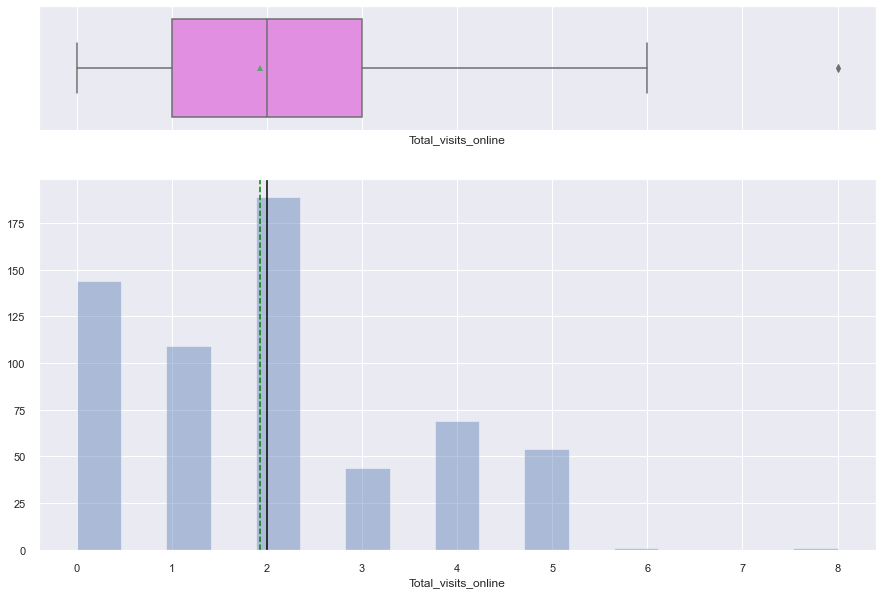

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data["Total_visits_online"])

In [28]:
# variables used for clustering
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

<IPython.core.display.Javascript object>

In [29]:
# Scaling the data set before clustering
scaler = StandardScaler()
subset = data[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [30]:
# Creating a dataframe from the scaled data
subset_scaled_data = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

## <a id = "link4"></a> Applying K-means clustering algorithms 

Number of Clusters: 1 	Average Distortion: 2.1448838999976645
Number of Clusters: 2 	Average Distortion: 1.4416323746977573
Number of Clusters: 3 	Average Distortion: 1.260531409284154
Number of Clusters: 4 	Average Distortion: 1.1953791479701255
Number of Clusters: 5 	Average Distortion: 1.134785961223043
Number of Clusters: 6 	Average Distortion: 1.0936898201141714
Number of Clusters: 7 	Average Distortion: 1.0581710973489638
Number of Clusters: 8 	Average Distortion: 1.0352815568807736


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

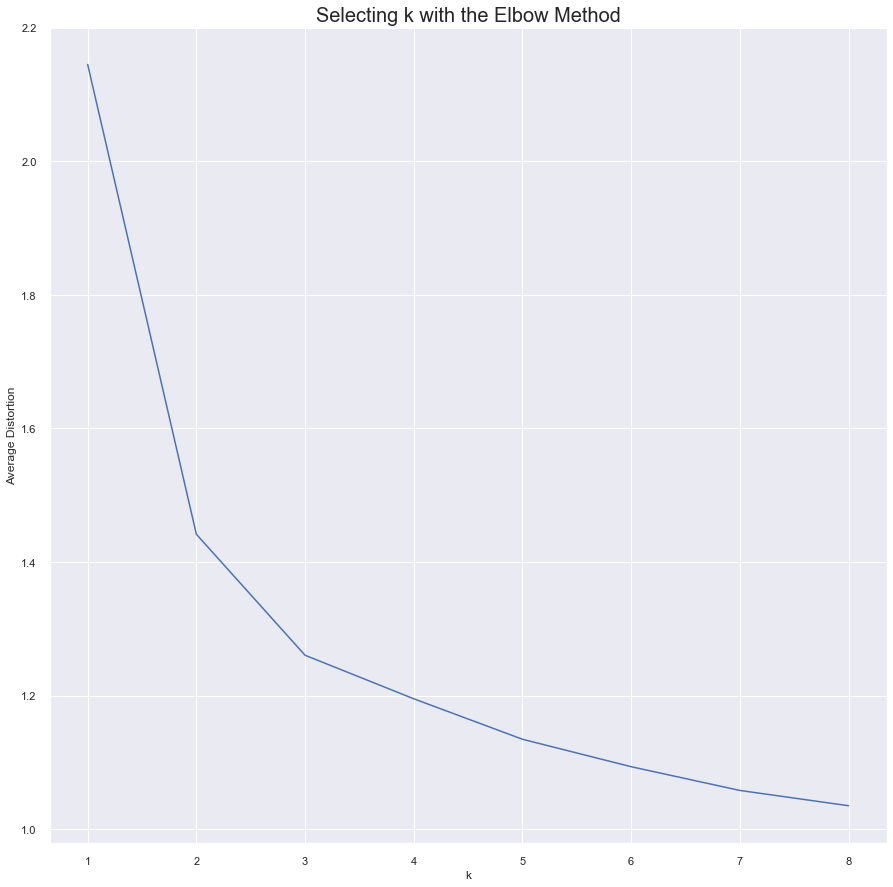

<IPython.core.display.Javascript object>

In [31]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_data)
    prediction = model.predict(subset_scaled_data)
    distortion = (
        sum(
            np.min(
                cdist(subset_scaled_data, model.cluster_centers_, "euclidean"), axis=1
            )
        )
        / subset_scaled_data.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

**Let's check the silhouette scores.**

For n_clusters = 3, silhouette score is 0.376130422422812
For n_clusters = 4, silhouette score is 0.3164399263032608
For n_clusters = 5, silhouette score is 0.227480086187098
For n_clusters = 6, silhouette score is 0.2126365240056063
For n_clusters = 7, silhouette score is 0.20572979093302424
For n_clusters = 8, silhouette score is 0.19478852832092353
For n_clusters = 9, silhouette score is 0.18849313355452113


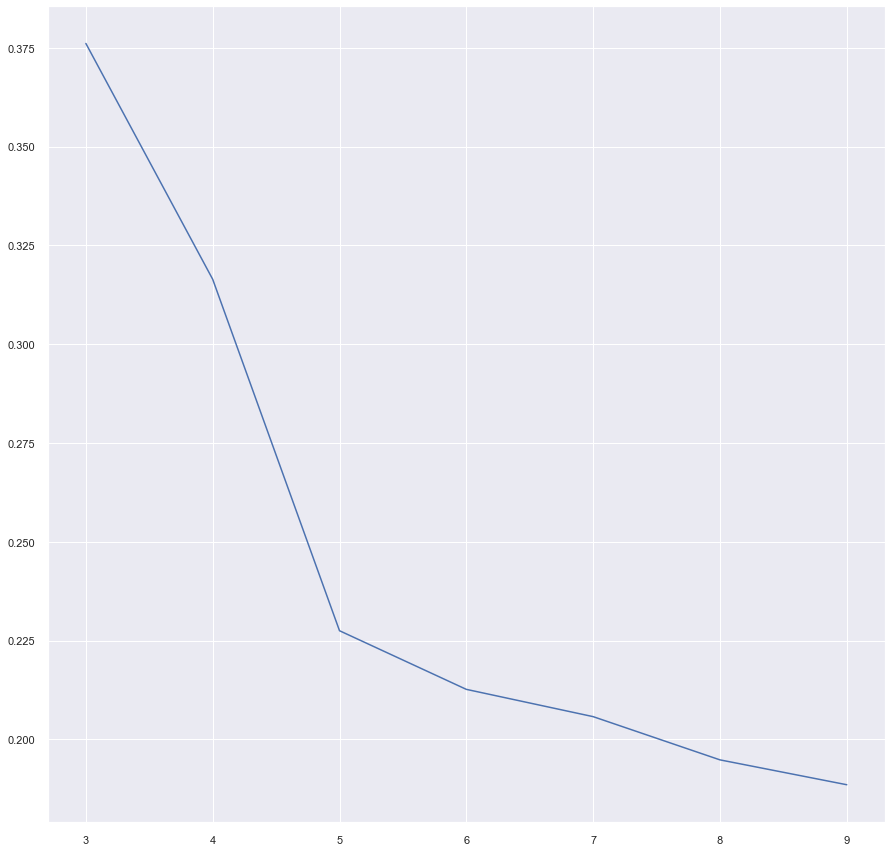

<IPython.core.display.Javascript object>

In [32]:
sil_score = []
cluster_list = list(range(3, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_data))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_data, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**From the silhouette scores, it seems that 5 is a good value of k.**

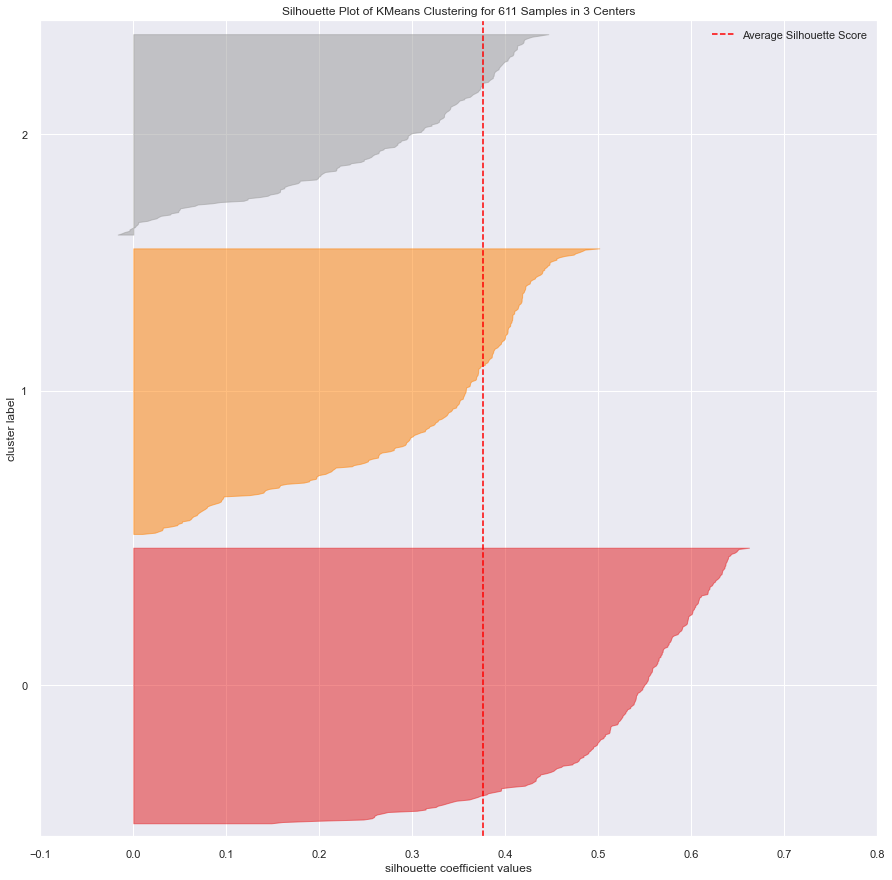

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 611 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

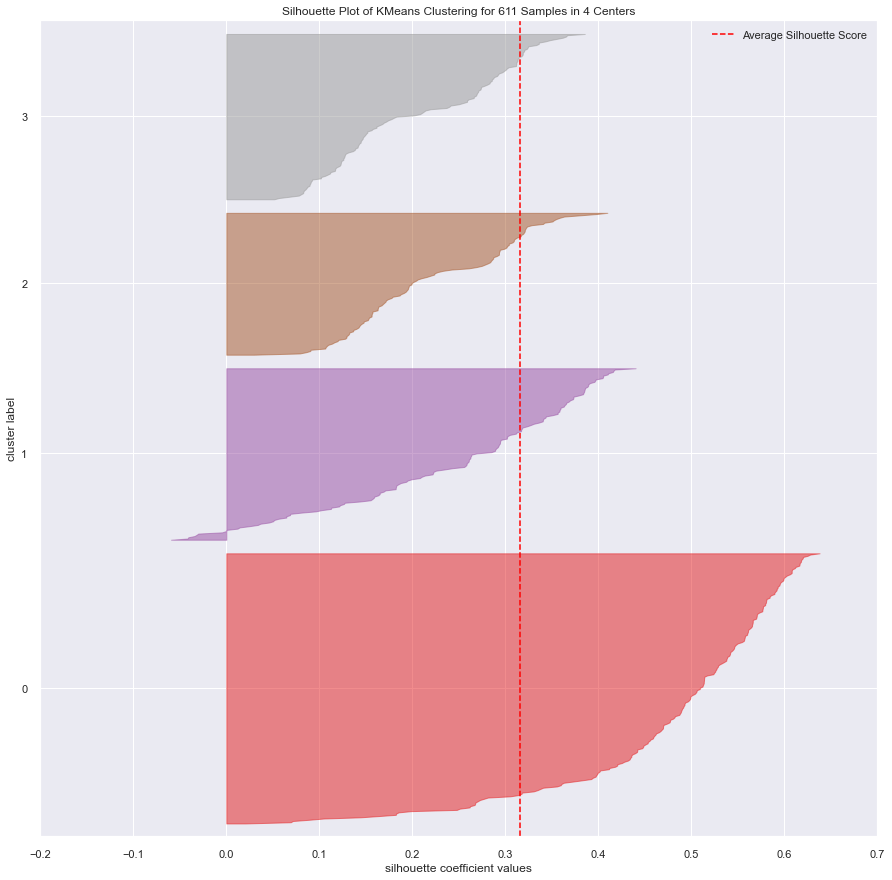

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 611 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

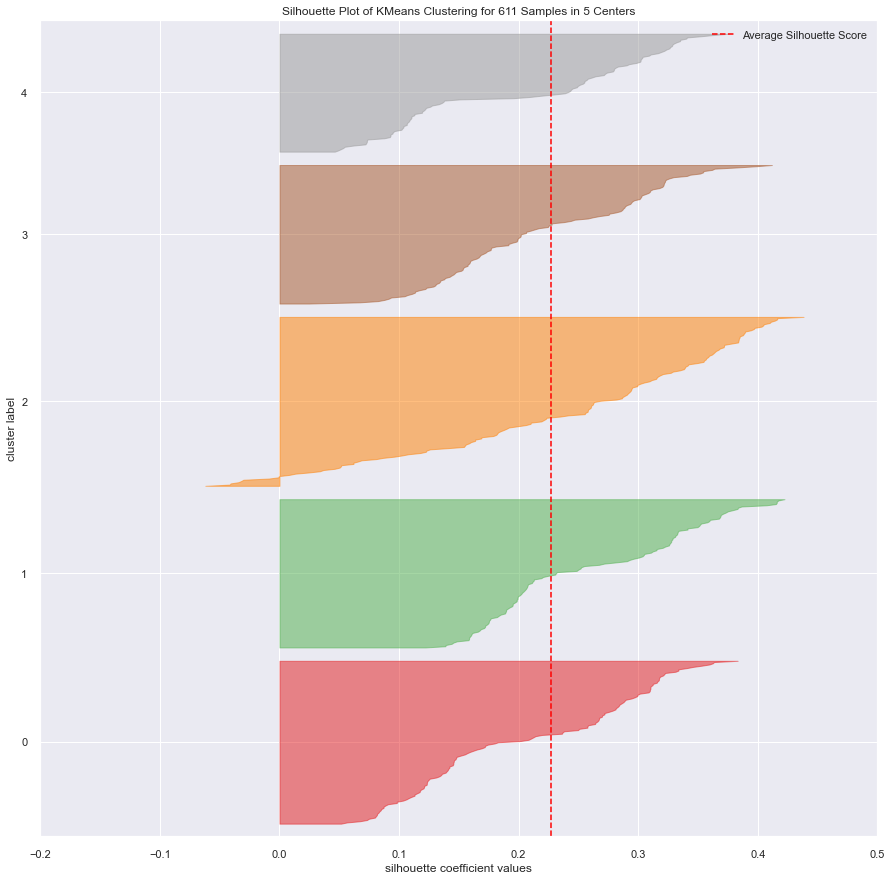

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 611 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [35]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_data)
visualizer.show()

In [36]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(subset_scaled_data)

KMeans(n_clusters=5, random_state=0)

<IPython.core.display.Javascript object>

In [37]:
# adding kmeans cluster labels to the original dataframe
data["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [38]:
cluster_profile = data.groupby("K_means_segments").mean()

<IPython.core.display.Javascript object>

In [39]:
cluster_profile["count_in_each_segment"] = (
    data.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [40]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,19373.134328,5.455224,4.559701,1.052239,1.977612,134
1,11438.775510,2.367347,0.948980,2.418367,6.816327,98
2,59914.893617,5.567376,3.212766,1.000000,2.014184,141
3,12471.544715,2.422764,0.926829,4.439024,6.967480,123
4,19191.304348,5.539130,2.486957,0.991304,2.008696,115


<IPython.core.display.Javascript object>

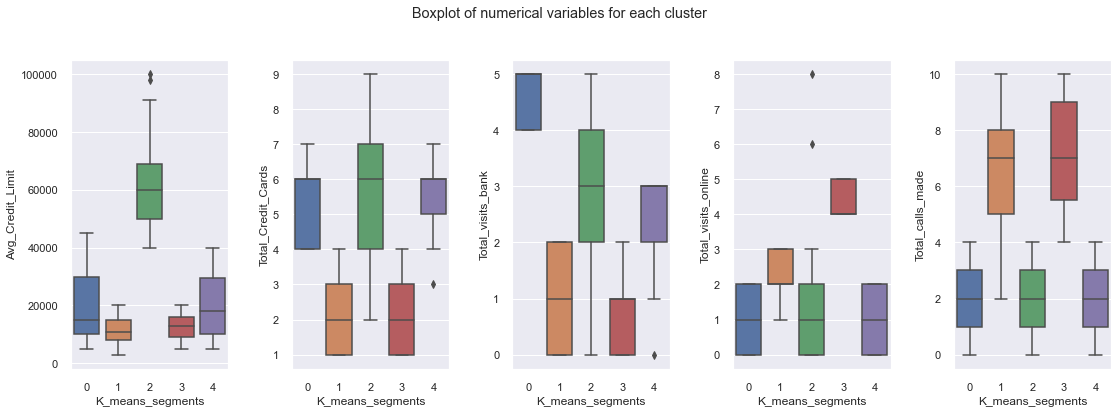

<IPython.core.display.Javascript object>

In [41]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights

- **Cluster 0**
   - The customers Avg credit limit is 19373.00
   - They have 5 cards
   - They visit the bank about 4.5 times
   - They visit the online site 1 time 
   - They have made 1.9 calls to customer service
   
- **Cluster 1**
   - The customers Avg credit limit is 11438
   - They have  2.3 cards
   - They visit the bank about .9 times
   - They visit the online site 2.4 time 
   - They have made 6.9 calls to customer service
   
   
- **Cluster 2**
   - The customers Avg credit limit is 59914.00
   - They have  5.5 cards
   - They visit the bank about 3.2 times
   - They visit the online site 1 time 
   - They have made 2 calls to customer service
   
- **Cluster 3**
   - The customers Avg credit limit is 12471.00
   - They have  2.4 cards
   - They visit the bank about 4.4 times
   - They visit the online site 1 time 
   - They have made 6.9 calls to customer service
   
   
- **Cluster 4**
   - The customers Avg credit limit is 19191.00
   - They have  5.5 cards
   - They visit the bank about 2.4 times
   - They visit the online site 1 time 
   - They have made 2 calls to customer service
   
- **input:**
    - So far cluster 1 and 3 are very alike besides the visit to online site which cluster 4 has more of.


## <a id = "link5"></a> Applying Hierarchical clustering

In [43]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.25840761143974134.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8162425103590711.
Cophenetic correlation for Euclidean distance and average linkage is 0.8312295289172809.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8252107998815872.
Cophenetic correlation for Chebyshev distance and single linkage is 0.24591251319145765.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7063530284123921.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8200329080159267.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7978504161817528.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.22709147806559993.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.39824390646077895.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6292299346343884.
Copheneti

<IPython.core.display.Javascript object>

In [44]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8312295289172809, which is obtained with Euclidean distance and average linkage.


<IPython.core.display.Javascript object>

**Let's explore different linkage methods with Euclidean distance only.**

In [45]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_data, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_data))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.25840761143974134.
Cophenetic correlation for complete linkage is 0.8162425103590711.
Cophenetic correlation for average linkage is 0.8312295289172809.
Cophenetic correlation for centroid linkage is 0.8229757761274248.
Cophenetic correlation for ward linkage is 0.7946519309058675.
Cophenetic correlation for weighted linkage is 0.8252107998815872.


<IPython.core.display.Javascript object>

In [46]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8312295289172809, which is obtained with average linkage.


<IPython.core.display.Javascript object>

**Let's see the dendrograms for the different linkage methods.**

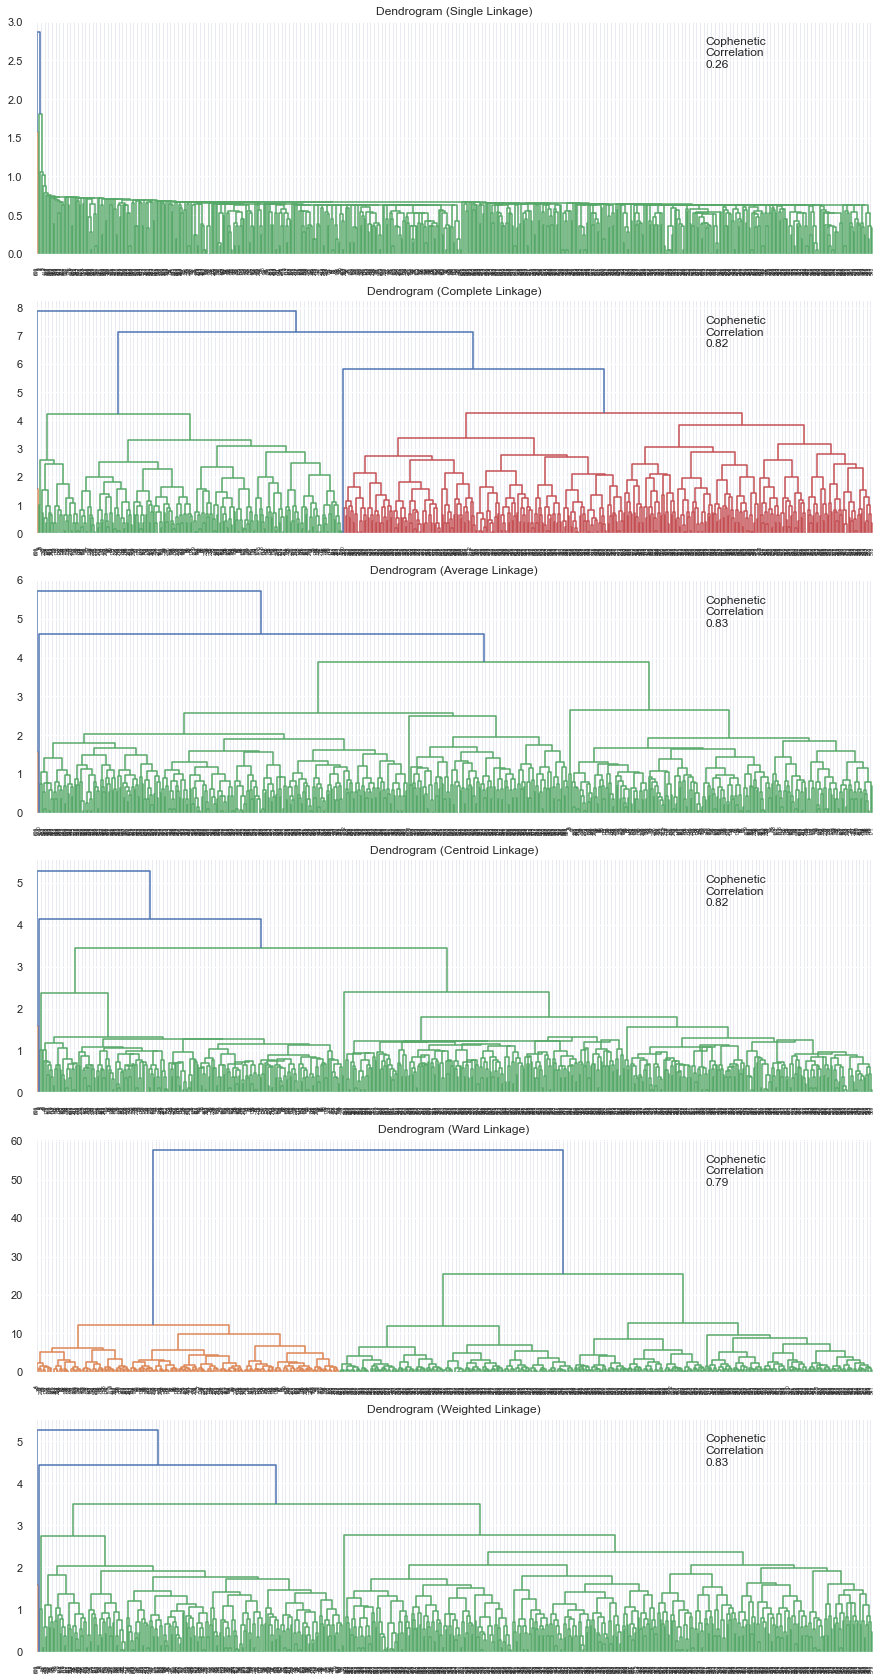

<IPython.core.display.Javascript object>

In [47]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_data, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_data))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations**

- Dendrogram for Avergae linkage and Weighted linkage shows distinct and separate clusters.

In [48]:
# let's create a dataframe to compare cophenetic correlations for each linkage method
data_cc = pd.DataFrame(compare, columns=compare_cols)
data_cc

,Linkage,Cophenetic Coefficient
0,single,0.258408
1,complete,0.816243
2,average,0.831230
3,centroid,0.822976
4,ward,0.794652
5,weighted,0.825211


<IPython.core.display.Javascript object>

**Let's see the dendrogram for Mahalanobis and Manhattan distances with average and weighted linkage methods (as they gave high cophenetic correlation values).**

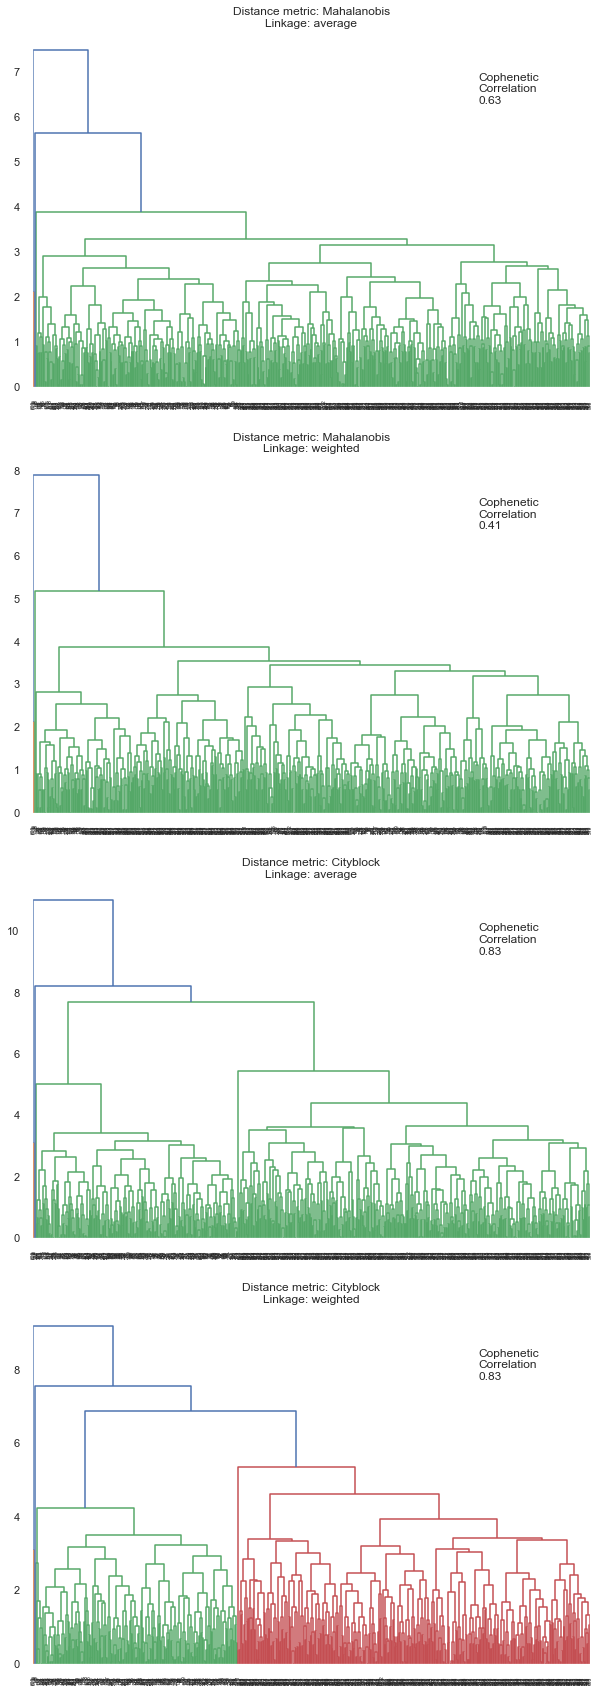

<IPython.core.display.Javascript object>

In [49]:
# list of distance metrics
distance_metrics = ["mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["average", "weighted"]

# to create a subplot image
fig, axs = plt.subplots(
    len(distance_metrics) + len(distance_metrics), 1, figsize=(10, 30)
)

i = 0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_data, metric=dm, method=lm)

        dendrogram(Z, ax=axs[i])
        axs[i].set_title("Distance metric: {}\nLinkage: {}".format(dm.capitalize(), lm))

        coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_data))
        axs[i].annotate(
            f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
            (0.80, 0.80),
            xycoords="axes fraction",
        )
        i += 1

**Observations**

- Out of all the dendrograms we saw, it is clear that the dendrogram with Average linkage and Weighted linkage gave us separate and distinct clusters.
- 4 would be the appropriate number of the clusters from the dendrogram with Average linkage 

**Let's create 4 clusters with both Average linkage method.**

**Average linkage** 

In [50]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_data)

AgglomerativeClustering(linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [51]:
# adding hierarchical cluster labels to the original and scaled dataframes

subset_scaled_data["HC_Clusters"] = HCmodel.labels_
data["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

## Cluster Profiling

In [52]:
cluster_profile1 = data.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [53]:
cluster_profile1["count_in_each_segments"] = (
    data.groupby("HC_Clusters")["Avg_Credit_Limit"].count().values
)

<IPython.core.display.Javascript object>

In [54]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12027.027027,2.400901,0.932432,3.531532,6.873874,2.121622,222
1,33541.450777,5.520725,3.492228,0.984456,2.010363,1.896373,386
2,100000.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1
3,94500.000000,8.500000,0.500000,7.000000,1.500000,2.000000,2


<IPython.core.display.Javascript object>

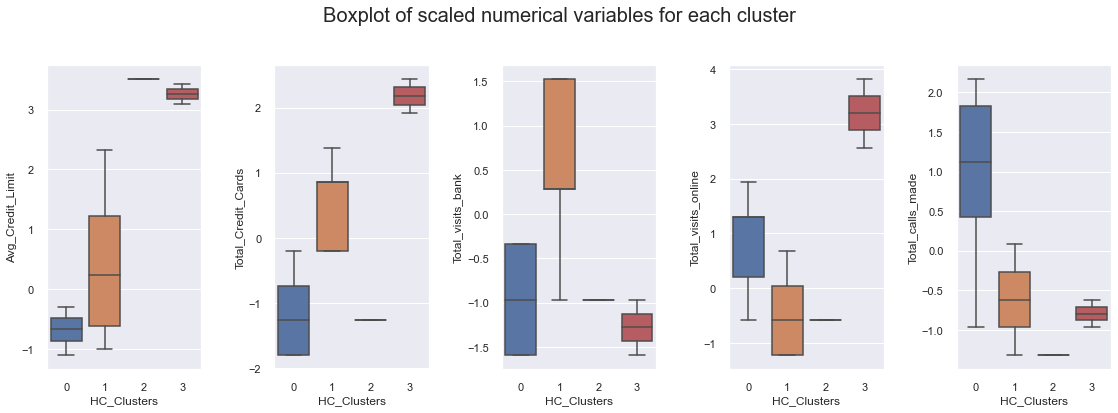

<IPython.core.display.Javascript object>

In [55]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_data[num_col[counter]],
        x=subset_scaled_data["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

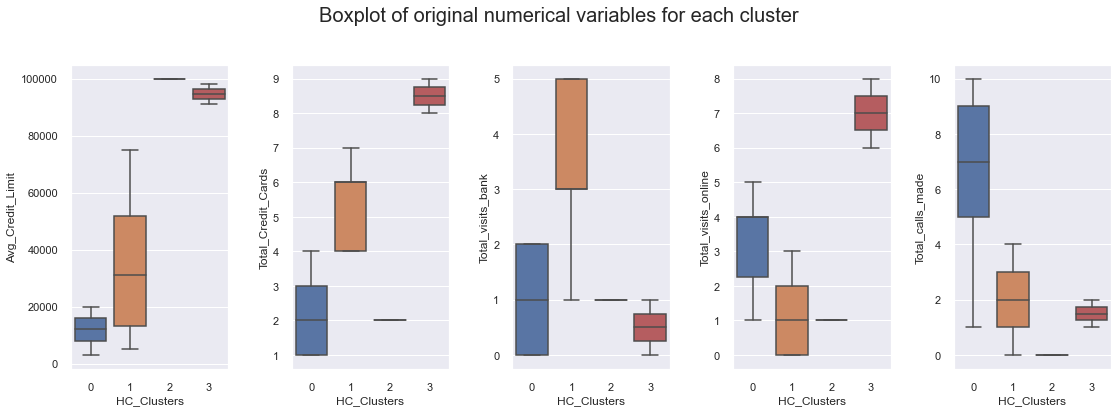

<IPython.core.display.Javascript object>

In [56]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["HC_Clusters"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [57]:
pd.crosstab(data.HC_Clusters, data.Avg_Credit_Limit).style.highlight_max(
    color="lightgreen", axis=0
)

Avg_Credit_Limit,3000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000,15000,16000,17000,18000,19000,20000,25000,26000,27000,28000,29000,30000,31000,32000,33000,34000,35000,36000,37000,38000,39000,40000,41000,42000,43000,44000,45000,46000,47000,48000,49000,50000,51000,52000,54000,55000,56000,57000,58000,59000,60000,61000,62000,63000,64000,65000,66000,67000,68000,69000,70000,71000,72000,73000,74000,75000,91000,98000,100000
HC_Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,13,17,12,20,18,14,15,8,18,14,11,13,13,9,13,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,8,14,12,15,10,12,9,10,10,9,6,9,10,14,13,7,1,5,2,3,5,6,5,2,4,6,2,11,6,8,7,3,6,2,1,3,3,3,6,6,4,7,4,6,4,1,7,3,3,4,5,3,3,2,4,5,4,3,7,4,10,4,3,4,6,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


<IPython.core.display.Javascript object>

## Insights

- **Cluster 0**
   - The customers Avg credit limit is 12027.00
   - They have are 2.4 cards
   - They visit the bank about .93 times
   - They visit the online site 3.5 time 
   - They have made 6.8 calls to customer service
   
- **Cluster 1**
   - The customers Avg credit limit is 33541.00
   - They have are 5.5 cards
   - They visit the bank about 3.4 times
   - They visit the online site .9 time 
   - They have made 6.9 calls to customer service
   
   
- **Cluster 2**
   - The customers Avg credit limit is 100000.00
   - They have are 2 cards
   - They visit the bank about 1 times
   - They visit the online site 1 time 
   - They have made 0 calls to customer service
   
- **Cluster 3**
   - The customers Avg credit limit is 94500.00
   - They have are 8.5 cards
   - They visit the bank about .5 times
   - They visit the online site 7 time 
   - They have made 1.5 calls to customer service
   
- **input:**
    - So far seem pretty spread out though out the data 


## <a id = "link6"></a> "Compare cluster K-means clusters and Hierarchical clusters - Perform cluster profiling - Derive Insights"

##### K-means clusters 

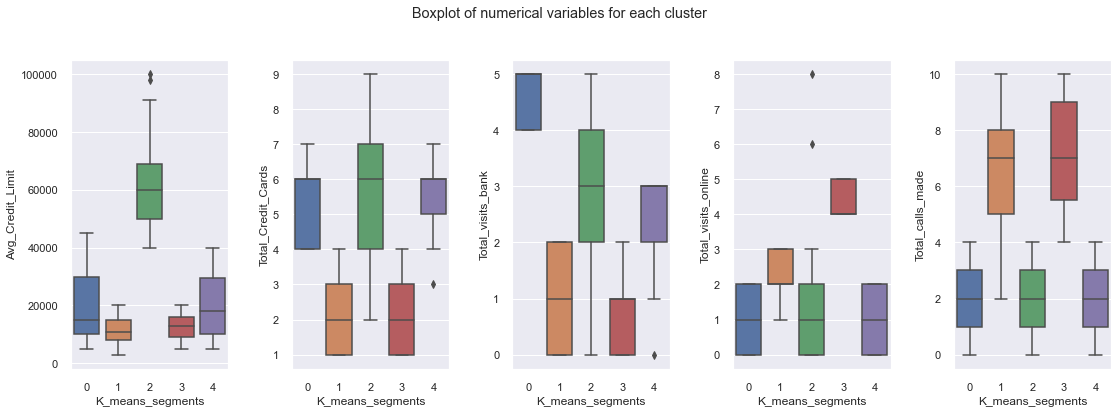

<IPython.core.display.Javascript object>

In [58]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=data[num_col[counter]], x=data["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [59]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,19373.134328,5.455224,4.559701,1.052239,1.977612,134
1,11438.775510,2.367347,0.948980,2.418367,6.816327,98
2,59914.893617,5.567376,3.212766,1.000000,2.014184,141
3,12471.544715,2.422764,0.926829,4.439024,6.967480,123
4,19191.304348,5.539130,2.486957,0.991304,2.008696,115


<IPython.core.display.Javascript object>

- **Cluster 0**
   - The customers Avg credit limit is 19373.00
   - They have 5 cards
   - They visit the bank about 4.5 times
   - They visit the online site 1 time 
   - They have made 1.9 calls to customer service
   
- **Cluster 1**
   - The customers Avg credit limit is 11438
   - They have  2.3 cards
   - They visit the bank about .9 times
   - They visit the online site 2.4 time 
   - They have made 6.9 calls to customer service
   
   
- **Cluster 2**
   - The customers Avg credit limit is 59914.00
   - They have  5.5 cards
   - They visit the bank about 3.2 times
   - They visit the online site 1 time 
   - They have made 2 calls to customer service
   
- **Cluster 3**
   - The customers Avg credit limit is 12471.00
   - They have  2.4 cards
   - They visit the bank about 4.4 times
   - They visit the online site 1 time 
   - They have made 6.9 calls to customer service
   
   
- **Cluster 4**
   - The customers Avg credit limit is 19191.00
   - They have  5.5 cards
   - They visit the bank about 2.4 times
   - They visit the online site 1 time 
   - They have made 2 calls to customer service
   
- **input:**
    - So far cluster 1 and 3 are very alike besides the visit to online site which cluster 4 has more of.

#### Hierarchical clusters

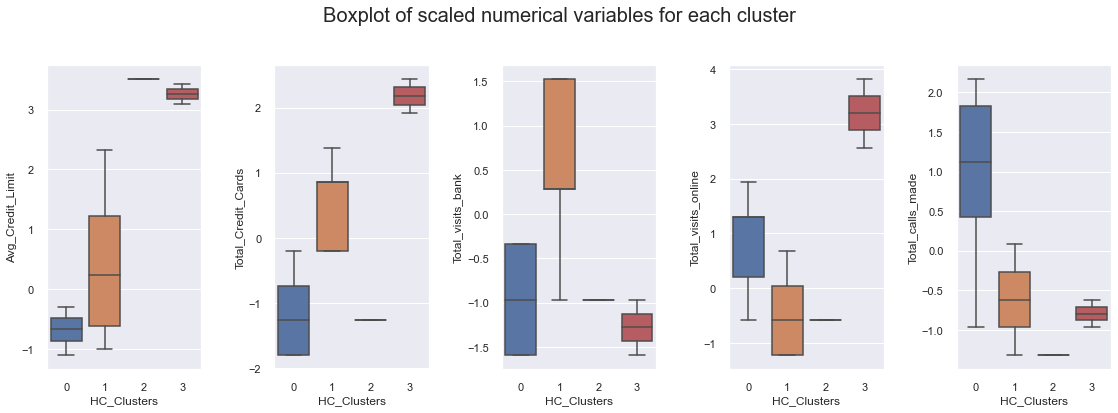

<IPython.core.display.Javascript object>

In [60]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_data[num_col[counter]],
        x=subset_scaled_data["HC_Clusters"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

In [61]:
# let's display cluster profiles
cluster_profile1.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,K_means_segments,count_in_each_segments
HC_Clusters,,,,,,,
0,12027.027027,2.400901,0.932432,3.531532,6.873874,2.121622,222
1,33541.450777,5.520725,3.492228,0.984456,2.010363,1.896373,386
2,100000.000000,2.000000,1.000000,1.000000,0.000000,2.000000,1
3,94500.000000,8.500000,0.500000,7.000000,1.500000,2.000000,2


<IPython.core.display.Javascript object>

## Insights

- **Cluster 0**
   - The customers Avg credit limit is 12027.00
   - They have are 2.4 cards
   - They visit the bank about .93 times
   - They visit the online site 3.5 time 
   - They have made 6.8 calls to customer service
   
- **Cluster 1**
   - The customers Avg credit limit is 33541.00
   - They have are 5.5 cards
   - They visit the bank about 3.4 times
   - They visit the online site .9 time 
   - They have made 6.9 calls to customer service
   
   
- **Cluster 2**
   - The customers Avg credit limit is 100000.00
   - They have are 2 cards
   - They visit the bank about 1 times
   - They visit the online site 1 time 
   - They have made 0 calls to customer service
   
- **Cluster 3**
   - The customers Avg credit limit is 94500.00
   - They have are 8.5 cards
   - They visit the bank about .5 times
   - They visit the online site 7 time 
   - They have made 1.5 calls to customer service
   
- **input:**
    - So far seem pretty spread out though out the data 

## <a id = "link7"></a> Recommendations/Actionable Insights

* K-means clusters is a good option but it only allows use to see those customers between 10000 to 20000 even though most of the issues are from the lower credit limits. Will need to take into account the higher credit limits to see why they are more prone to likeing our service.

* The best model for us to use is the Hierarchical clusters even though it more expensive because they allow us to see the bigger picture across all the Avg credit limits to find which customers are having the most issues and calling the help line.

* Customer from Cluster 0 and Cluster 1 can be recommended to provide the input we need to help fix the customer service problem because they have the highest calls to customer service. 